In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/E91FBA6564D2/2022-09-23%2008:45:00.000/2022-09-23%2015:00:00.000"
reponse = requests.get(url)
print(reponse)

<Response [200]>


In [2]:
contenu = reponse.json()
print(type(contenu))

<class 'dict'>


In [3]:
contenu['resultat']
pd.DataFrame(contenu['resultat'])

,timestamp,macModule,rssi
0,2022-09-23 14:59:16.392,C45BBE39870E,-77
1,2022-09-23 14:59:10.578,C45BBE39870E,-74
2,2022-09-23 14:59:02.829,C45BBE39870E,-74
3,2022-09-23 14:58:53.250,C45BBE39870E,-71
4,2022-09-23 14:58:43.530,C45BBE39870E,-70
...,...,...,...
2788,2022-09-23 08:45:42.623,C45BBE39F9AE,-73
2789,2022-09-23 08:45:32.909,C45BBE39F9AE,-73
2790,2022-09-23 08:45:23.170,C45BBE39F9AE,-66
2791,2022-09-23 08:45:13.331,C45BBE39F9AE,-73


In [ ]:
# Heure de la première donnée 
contenu['resultat']

In [5]:
# rssi de la première donnée
contenu['resultat'][1]['rssi']

-74

In [4]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39870E', 'C45BBE39F42A', 'C45BBE39F56A', 'C45BBE39F9AE', 'AB032A311FAA', 'A8032A31204E', 'C45BBE37B346']

Heure de la prise 	Position
	
16h33-16h38	        31m
16h38-16h40 	    34
16h40-16h42      	37
16h42-16h44     	40
16h44-16h46 	    43
16h46-16h48 	    46 (pas capté)
16h48-16h50      	49
16h50-16h52      	54
16h52-16h54      	60

In [49]:
import csv
for i in range(10):
    myfile = list_capteurs[i] + '.csv'
    with open(myfile,'w',newline='') as f:
        ecrire=csv.writer(f)
        ecrire.writerow([list_capteurs[i]])
        for mesure in contenu['resultat']:
            if mesure['macModule'] == list_capteurs[i]:
                if '2022-09-23 14:32:00.000' < mesure['timestamp'] < '2022-09-23 14:36:00.000':
                    ecrire.writerow([mesure['rssi']])

In [50]:
dataFrame = pd.concat(map(pd.read_csv, [list_capteurs[i]+'.csv' for i in range(10)]), ignore_index=True)
dataFrame = dataFrame.fillna(0.0)

In [51]:
dataFrame.to_csv(path_or_buf='csv_M_46.csv', decimal='.', sep= ',', index=False)

In [5]:
capt1 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt2 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt3 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt4 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt5 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt6 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt7 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt8 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt9 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt10 = pd.DataFrame(columns=[metre for metre in range(31, 61)])

In [6]:
dict = {'C45BBE384CD2' : capt1, 'C45BBE386362' : capt2, 'C45BBE386952' : capt3, 'C45BBE39870E' : capt4, 'C45BBE39F42A' : capt5, 'C45BBE39F56A' : capt6, 'C45BBE39F9AE' : capt7, 'AB032A311FAA' : capt8, 'A8032A31204E' : capt9, 'C45BBE37B346' : capt10}

In [7]:
for metre in range(31, 61):
    path = './Data_metres/csv_M_' + str(metre) + '.csv'
    df = pd.read_csv(path)
    for col in df.columns:
        df2=pd.DataFrame(df[col])
        for index, row in df2.iterrows():
            if row[0] == 0:
                df2 = df2.drop(index, 0)
            dict[col][metre]=df2

C:\Users\matth\AppData\Local\Temp\ipykernel_18056\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_18056\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_18056\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_18056\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_18056\1623467752.py:8: FutureWarning: In a future ve

In [8]:
for capteur in list_capteurs:
    dict[capteur].to_csv(path_or_buf='./Data_capteurs/csv_' + capteur + '.csv', decimal='.', sep= ',', index=False)

<AxesSubplot:title={'center':'Répartition des rssi selon la position pour le capteur A8032A31204E'}>

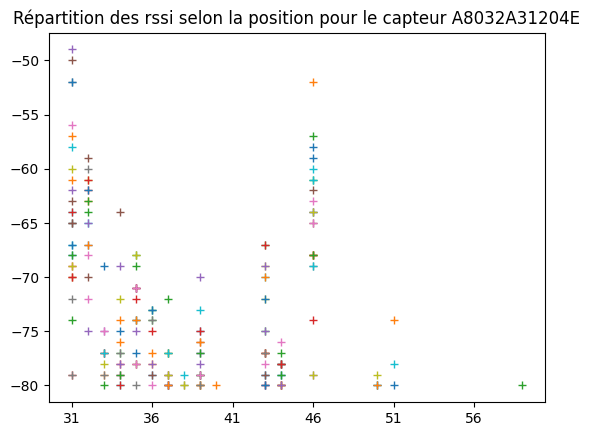

In [9]:
df = pd.read_csv('./Data_capteurs/csv_A8032A31204E.csv')
df.transpose().plot(style='+', legend=False, title='Répartition des rssi selon la position pour le capteur A8032A31204E')

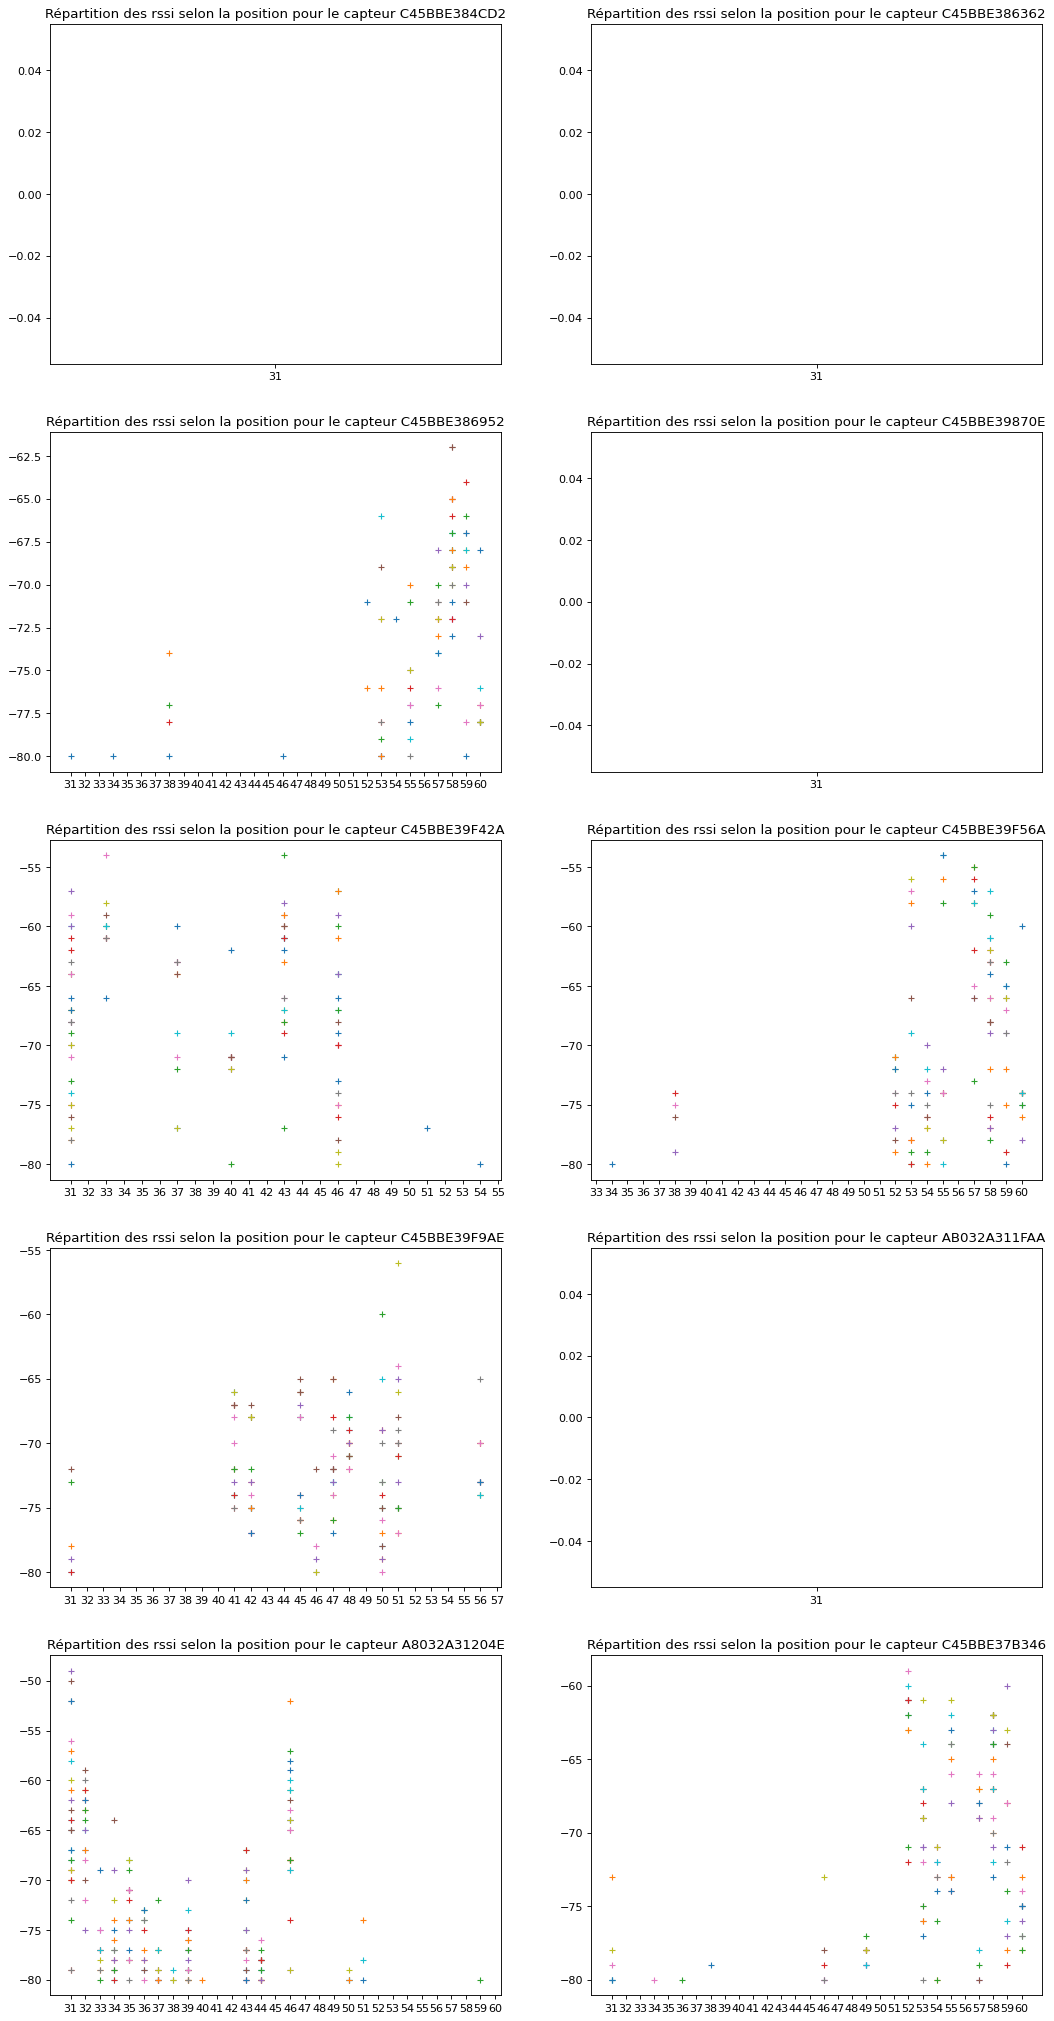

In [10]:
plt.figure(figsize=(16, 32), dpi=80)
for i, capteur in enumerate(list_capteurs):
    df = pd.read_csv('./Data_capteurs/csv_'+capteur+'.csv')
    plt.subplot(5, 2, i+1)
    plt.plot(df.transpose(), '+')
    plt.title(f'Répartition des rssi selon la position pour le capteur {capteur}')